In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

from run_utils import run_env_experiment, plot_ratings_mses

sys.path.append('../') 
from reclab.environments.topics import Topics
from reclab.environments.engelhardt import Engelhardt
from reclab.environments.latent_factors import LatentFactorBehavior



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Illustration of Different User Behaviors

In this notebook, for a fixed level of model and user behavior complexity, we illustrate the effect of different time-varying user behaviors on recommendation system quality. 
Specifically, we evaluate two metrics: observed ratings of recommended items, and predictive accuracy on recommended items. We may also want to look at diversity metrics, or those used in other papers.

In [3]:
## Key Parameters across all settings
expdirname = 'dynamic_user_static_rec'

topics = True

env_params = {
    'num_users': 100,
    'num_items': 170,
    'rating_frequency': 0.2,
    'num_init_ratings': 1000
}

exp_params = {
    'n_trials': 10,
    'len_trial': 20,
    'SEED': 24532,
}

## Static User Behavior

Here, the user model does not change over time. 

In [4]:
if topics:
    params = {'num_topics': 10}
    env = Topics(**params, **env_params)
else:
    params = {'latent_dim': 8}
    env = LatentFactorBehavior(**params, **env_params)
datafilename = 'static_'+env.name+'.npz'

mean_ratings, mses = run_env_experiment(env, exp_params, env_params, params, 
                                        expdirname, datafilename)

reading from data/dynamic_user_static_rec/static_topics.npz


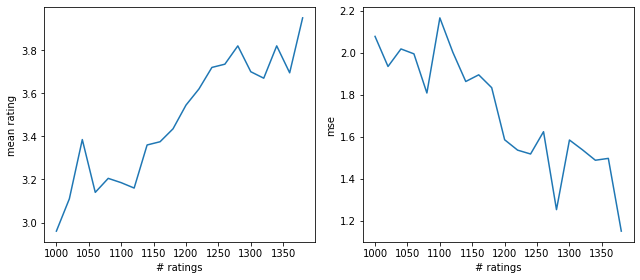

In [7]:
plot_ratings_mses(mean_ratings, mses, env_params)

## Partially Hidden User Behavior

Here, there is a portion of item utility that is unknown to a user until the item is consumed. From the paper "How Algorithmic Confounding in Recommendation Systems
Increases Homogeneity and Decreases Utility".

In [8]:
if topics:
    params = {'num_topics': 10}
    env = Engelhardt(**params, **env_params)

    datafilename = env.name+'.npz'
    mean_ratings, mses = run_env_experiment(env, exp_params, env_params, params, 
                                        expdirname, datafilename)

reading from data/dynamic_user_static_rec/engelhardt.npz


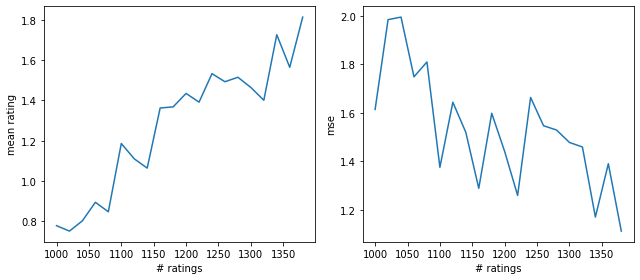

In [9]:
plot_ratings_mses(mean_ratings, mses, env_params)

## User Interests Shift with Exposure

Here, the underlying user interest changes over time to match the body of items that have been recommended.

In [16]:
if topics:
    params = {'num_topics': 10, 'topic_change': 0.1}
    env = Topics(**params, **env_params)
else:
    params = {'latent_dim': 8, 'affinity_change': 0.1}
    env = LatentFactorBehavior(**params, **env_params)
datafilename = 'increasing_interest_'+env.name+'.npz'
mean_ratings, mses = run_env_experiment(env, exp_params, env_params, params, 
                                        expdirname, datafilename)

reading from data/dynamic_user_static_rec/increasing_interest_topics.npz


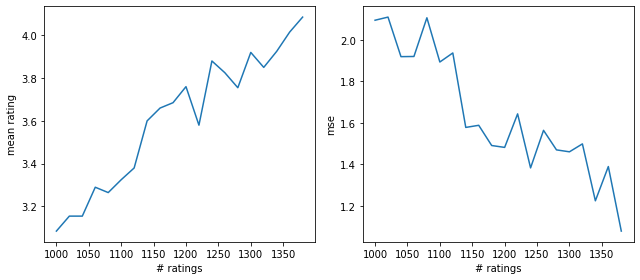

In [17]:
plot_ratings_mses(mean_ratings, mses, env_params)

## User Gets Bored

Here, user interest decreases for items too similar to those that they have recently been exposed to, with some decay in the effect.

In [14]:
if topics:
    params = {'num_topics': 10, 'memory_length': 5, 'boredom_threshold': 2, 
              'boredom_penalty': 1.0}
    env = Topics(**params, **env_params)
else:
    params = {'latent_dim': 8, 'memory_length': 5, 'boredom_threshold': 0.5, 
              'boredom_penalty': 1.0}
    env = LatentFactorBehavior(**params, **env_params)
datafilename = 'boredom_'+env.name+'.npz'
mean_ratings, mses = run_env_experiment(env, exp_params, env_params, params, 
                                        expdirname, datafilename)

reading from data/dynamic_user_static_rec/boredom_topics.npz


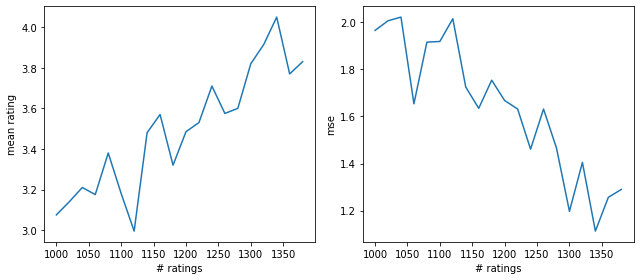

In [15]:
plot_ratings_mses(mean_ratings, mses, env_params)

## User Interests Shift, also Gets Bored

This is a combination of the previous two cases, where users gradually become more interested in topics that they are exposed to, but also exhibit boredom when they see many similar items in a row.

In [18]:
if topics:
    params = {'num_topics': 10, 'topic_change': 0.1, 'memory_length': 5, 
              'boredom_threshold': 2, 'boredom_penalty': 1.0}
    env = Topics(**params, **env_params)
else:
    params = {'latent_dim': 8, 'affinity_change': 0.1, 'memory_length': 5, 
              'boredom_threshold': 0.5, 'boredom_penalty': 1.0}
    env = LatentFactorBehavior(**params, **env_params)
datafilename = 'boredom_and_interest_'+env.name+'.npz'
mean_ratings, mses = run_env_experiment(env, exp_params, env_params, params, 
                                        expdirname, datafilename)

reading from data/dynamic_user_static_rec/boredom_and_interest_topics.npz


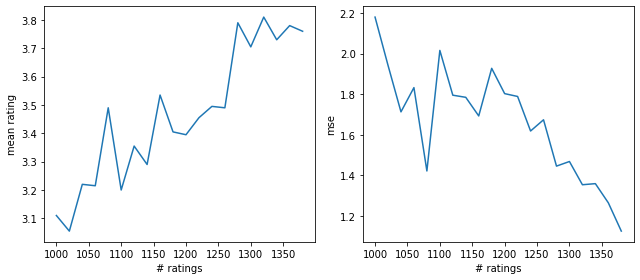

In [19]:
plot_ratings_mses(mean_ratings, mses, env_params)